# **GeoChem PCA**

**Imports**

In [1]:
import pandas as pd
import numpy as np

**Loading Dataset**

We use pandas library to load datapoints from the csv file to the pandas dataframe named `df`.

The second column contains the stratigraphic position, which is used as the external variable to interpret our ordination. Columns after that (3 to 10) contains the geochemical data which we want to ordinate.

In [2]:
# GITHUB link where data is stored
url = 'https://raw.githubusercontent.com/tgautam03/ML-GEO/main/PCA/NashvilleCarbonates.csv'

In [3]:
df = pd.read_csv(url)
df

,Unnamed: 0,StratPosition,d13C,d18O,Al,Ca,Fe,Mg,Mn,Si
0,Ae,35.080,1.95,-4.66,1.49,297.16,1.52,2.22,0.34,8.61
1,Ad,34.745,1.82,-4.57,2.73,275.89,2.70,2.84,0.33,7.32
2,Ac,34.660,1.91,-4.77,4.26,328.11,3.13,3.12,0.40,9.65
3,Ab,34.555,0.93,-4.58,4.69,329.66,9.11,2.88,0.47,23.07
4,Aa,34.285,-0.34,-4.54,4.80,285.67,3.46,3.69,0.45,9.97
...,...,...,...,...,...,...,...,...,...,...
195,H16,32.650,1.07,-3.91,7.70,249.25,7.79,10.67,0.13,12.77
196,H17,32.550,1.28,-3.88,9.03,245.66,6.31,8.15,0.11,18.51
197,H18,32.450,1.37,-3.97,4.32,335.58,3.90,5.96,0.11,7.84
198,H19,32.350,0.49,-4.06,4.25,299.89,3.16,4.10,0.07,7.75


Next step would be to separate geochemical data and store that in a separate dataframe `geochem_df` and stratigraphic position in another dataframe `strat_df`.

In [4]:
geochem_df = df.iloc[:,2:]
strat_df = df.iloc[:,1:2]

Visualizing `geochem_df` and `strat_df`.

In [5]:
geochem_df

,d13C,d18O,Al,Ca,Fe,Mg,Mn,Si
0,1.95,-4.66,1.49,297.16,1.52,2.22,0.34,8.61
1,1.82,-4.57,2.73,275.89,2.70,2.84,0.33,7.32
2,1.91,-4.77,4.26,328.11,3.13,3.12,0.40,9.65
3,0.93,-4.58,4.69,329.66,9.11,2.88,0.47,23.07
4,-0.34,-4.54,4.80,285.67,3.46,3.69,0.45,9.97
...,...,...,...,...,...,...,...,...
195,1.07,-3.91,7.70,249.25,7.79,10.67,0.13,12.77
196,1.28,-3.88,9.03,245.66,6.31,8.15,0.11,18.51
197,1.37,-3.97,4.32,335.58,3.90,5.96,0.11,7.84
198,0.49,-4.06,4.25,299.89,3.16,4.10,0.07,7.75


In [6]:
strat_df

,StratPosition
0,35.080
1,34.745
2,34.660
3,34.555
4,34.285
...,...
195,32.650
196,32.550
197,32.450
198,32.350


Let's now load `geochem_df` and `strat_df` into teo separate numpy arrays.

In [7]:
x = geochem_df.values
x, x.shape

(array([[ 1.95, -4.66,  1.49, ...,  2.22,  0.34,  8.61],
        [ 1.82, -4.57,  2.73, ...,  2.84,  0.33,  7.32],
        [ 1.91, -4.77,  4.26, ...,  3.12,  0.4 ,  9.65],
        ...,
        [ 1.37, -3.97,  4.32, ...,  5.96,  0.11,  7.84],
        [ 0.49, -4.06,  4.25, ...,  4.1 ,  0.07,  7.75],
        [ 1.11, -3.51,  6.72, ..., 11.19,  0.12, 11.58]]), (200, 8))

In [8]:
y = strat_df.values
y, y.shape

(array([[35.08 ],
        [34.745],
        [34.66 ],
        [34.555],
        [34.285],
        [34.15 ],
        [34.05 ],
        [33.95 ],
        [33.85 ],
        [33.75 ],
        [33.65 ],
        [33.55 ],
        [33.45 ],
        [33.35 ],
        [33.25 ],
        [33.15 ],
        [33.05 ],
        [32.95 ],
        [32.85 ],
        [32.75 ],
        [32.65 ],
        [32.55 ],
        [32.45 ],
        [32.35 ],
        [32.25 ],
        [35.08 ],
        [34.745],
        [34.66 ],
        [34.555],
        [34.285],
        [34.15 ],
        [34.05 ],
        [33.95 ],
        [33.85 ],
        [33.75 ],
        [33.65 ],
        [33.55 ],
        [33.45 ],
        [33.35 ],
        [33.25 ],
        [33.15 ],
        [33.05 ],
        [32.95 ],
        [32.85 ],
        [32.75 ],
        [32.65 ],
        [32.55 ],
        [32.45 ],
        [32.35 ],
        [32.25 ],
        [35.08 ],
        [34.745],
        [34.66 ],
        [34.555],
        [34.285],
        [3

**Standardizing the dataset**

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [9]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

Fitting dataset to PCA and using 8 components (equal to the number of variables) and then visualizing the scree plot.

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
# Variance explained by each component
perc = pca.explained_variance_ratio_

Scree plot of the Variance Explained.

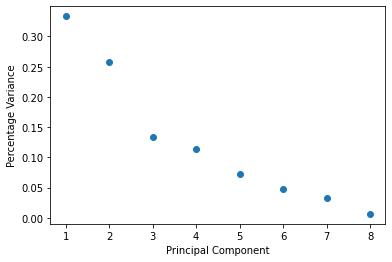

In [11]:
import matplotlib.pyplot as plt

x_axis = np.array([1,2,3,4,5,6,7,8])
plt.scatter(x_axis, perc)
plt.xlabel("Principal Component")
plt.ylabel("Percentage Variance")
plt.show()

1) The first thing we should look for in the scree plot is a marked drop in the percentage of explained variance.

2) The second criteria is which principal component explains more than one variable's worth of information.

If we consider the second case, each component's contribution comes around 12.5% . Let's now see how many pricipal components lie above this threshold.

In [12]:
perc > 0.125

array([ True,  True,  True, False, False, False, False, False])

From the above code block we can see that 1st three principal components lie over the set threshold and below we show how much they actually contribute together.

In [13]:
print("Total contribution of 1st three components: {} %".format(np.sum(perc[:3])*100))

Total contribution of 1st three components: 72.56807552755035 %


The nexr step is to see how the varibles contribute to each principal component. As there are 8 variables and 8 principal components, the `loading` matrix will be $8 \times 8$, but we are only concerned about the 1st three components.

In [14]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings.shape

(8, 8)

Storing these values in the dataframe `loadings_df` and visualizing them.

In [15]:
# creating a list of index names 
index_values = ['d13C', 'd180', 'Al', 'Ca', 
                'Fe', 'Mg', 'Mn', 'Si'] 
   
# creating a list of column names 
column_values = ['PC1', 'PC2', 'PC3'] 
  
# creating the dataframe 
loadings_df = pd.DataFrame(data = loadings[:,:3],  
                  index = index_values,  
                  columns = column_values)

loadings_df

,PC1,PC2,PC3
d13C,0.192518,0.300466,-0.724295
d180,0.019791,-0.890953,-0.039835
Al,0.891372,-0.308336,-0.102387
Ca,-0.560233,-0.078751,-0.360169
Fe,0.696894,0.445288,0.321456
Mg,0.435280,-0.713459,-0.340251
Mn,0.228903,0.618762,-0.431325
Si,0.898759,0.054642,0.058447


**Plotting Visualization**

The final step is to visualize the scatter plot in 2D. Here we'll use only the 1st two Principal Components. The data is divided into two classes, Carters (stratigraphic position < 34.2) and Hermitage (stratigraphic position > 34.2).

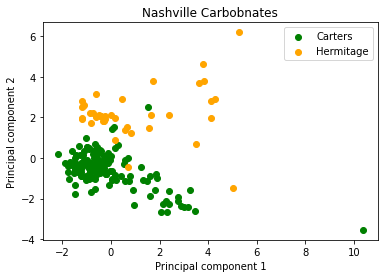

In [16]:
import matplotlib.pyplot as plt

y_label = (y > 34.2)*1
y_label = y_label.reshape(y_label.shape[0])

# plot the clusters
plt.scatter(principalComponents[y_label == 0,0],principalComponents[y_label == 0,1], color='green', label='Carters')
plt.scatter(principalComponents[y_label == 1,0],principalComponents[y_label == 1,1], color='orange', label='Hermitage')

plt.legend(scatterpoints=1)
plt.title("Nashville Carbobnates")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()